# Skin Cancer Classification - Convolutional Network

### by ReDay Zarra

This project utilizes a convolutional network to **identify 9 different kinds of skin cancers** including melanoma, nevus, and more. The model is **trained on over 2,200 pictures of various skin cancers** based off of this [dataset](https://www.kaggle.com/datasets/nodoubttome/skin-cancer9-classesisic). This model implements fundamental computer vision and classification techniques and includes a *step-by-step implementation of the model* as well as *in-depth notes to customize the model further* for higher accuracy.

## Importing the necessary libraries

Importing the essential **libraries for data manipulation and numerical analysis**. We will also need libraries for **data visualization and plotting**. Pickle will be used to **compress our folder of images** into train.p, valid.p, and test.p

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn

import os
import pickle
import cv2

## Preparing the data

To begin training the model we need to **prepare our images** which are currently stored in our main folder "skin-cancers". These images need to be extracted and stored into variables for us to access. The variables will be manipulated to become our training, validation, and testing sets.

### Configure the data

In [50]:
train_dir = "skin-cancers/Train"
test_dir = "skin-cancers/Test"

> We will first **locate the images**. The 'skin-cancers' main folder holds two folders called Train and Test which hold many sub-folders. The **variables store the file path** to these two folders.

In [51]:
width = 250
height = 250

>Choose the **dimensions to resize the images** into 250 x 250 px to ensure all the images are the same size.

In [52]:
train_subfolders = os.listdir(train_dir)
test_subfolders = os.listdir(test_dir)

> Target the **location of the subfolders** which are stored in the variables above.

### Creating training set

In [53]:
X_train = []
y_train = []

In [54]:
for subfolder in train_subfolders:
    
    subfolder_path = os.path.join(train_dir, subfolder)
    images = os.listdir(subfolder_path)
    
    for image in images:
        image_path = os.path.join(subfolder_path, image)
        
        # Read the image and resize it
        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (width, height))
        
        # Append the resized image to the X_train list
        X_train.append(resized_img)
        
        # Append the subfolder name as the label for the image
        y_train.append(subfolder)

> **Iterate through the sub-folders** in the Train folder and look for images in the folder. For every image in the sub-folder, **store the image** file path and read it into the variable img. Next, **resize the image** with the width and height parameters and then **append them to X_train and Y_train**.

### Creating the testing set

In [55]:
X_test = []
y_test = []

In [56]:
for subfolder in test_subfolders:
    subfolder_path = os.path.join(test_dir, subfolder)
    images = os.listdir(subfolder_path)
    for image in images:
        image_path = os.path.join(subfolder_path, image)
        # Read the image and resize it
        img = cv2.imread(image_path)
        resized_img = cv2.resize(img, (width, height))
        # Append the resized image to the X_test list
        X_test.append(resized_img)
        # Append the subfolder name as the label for the image
        y_test.append(subfolder)

> **Repeat the process** of iterating through the sub-folders **for the Test folder** and append the images to X_test and y_test.

### Creating validation set

The validation set can be **created with by using sci-kit learn's train_test_split()** function because we can simply **divide the training set** that we already have. I have chosen to **assign 20% of my training set** to my validation set. The validation data is then **stored separately in valid.p** file.

In [57]:
from sklearn.model_selection import train_test_split

# Split the train data into a validation set, using a 80/20 split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

### Creating the dataset files

> Use the training, testing, and validation dataset variables to **store the images in .p files**. The .dump() method from pickle allows you to create train.p, test.p, and valid.p and store the X and y variables in them.

In [58]:
with open("train.p", "wb") as f:
    pickle.dump((X_train, y_train), f)
    
with open("test.p", "wb") as f:
    pickle.dump((X_test, y_test), f)
    

with open('valid.p', 'wb') as f:
    pickle.dump((X_validation, y_validation), f)

### Convert to arrays

In [59]:
import numpy as np

# Convert the list of image data into a numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

> In order to manipulate the data any further, the training, testing, and validation **datasets need to be converted into arrays**. The .array() method from NumPy allows an simple way to do just that.

## Checking the dimensions of the dataset

Before processing the data, it is necessary to make sure the dataset and the variables we have stored them in are correct. We can easily see the shape of the 

In [60]:
X_train.shape

(1791, 250, 250, 3)

In [61]:
y_train.shape

(1791,)

In [62]:
X_test.shape

(118, 250, 250, 3)

In [63]:
y_test.shape

(118,)

In [64]:
X_valid.shape

(448, 250, 250, 3)

In [65]:
y_valid.shape

(448,)

## Verifying the images

Using **matplotlib to display** a randomly chosen image and see if it matches with its label, **just to see what the images are** and how the network will be classifying them.

In [66]:
i = 1

'nevus'

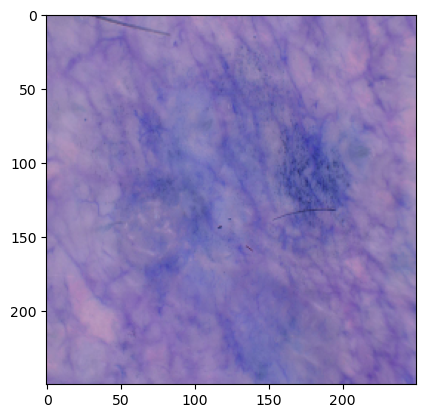

In [67]:
plt.imshow(X_train[i])
y_train[i]

'actinic keratosis'

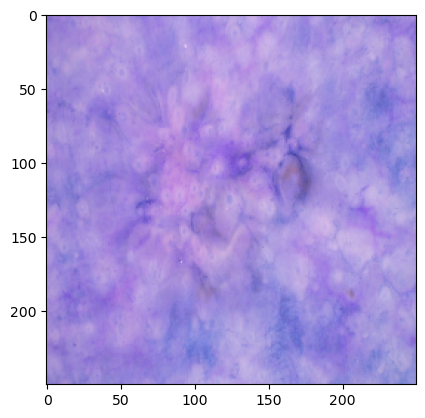

In [68]:
plt.imshow(X_test[i])
y_test[i]

'dermatofibroma'

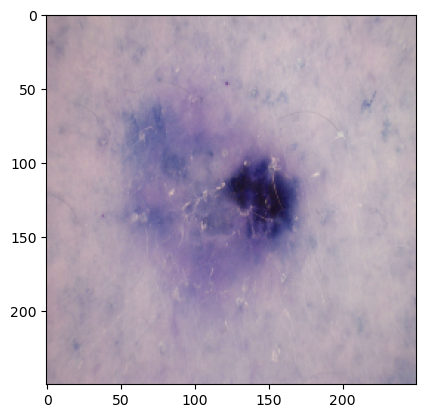

In [69]:
plt.imshow(X_valid[i])
y_valid[i]

## Processing the images

Preparing the data by **transforming the images so they are simpler for the network to understand**. Such as 
transforming the images from **RBG to grayscale (changes the depth from 3 to 1)**. I 
will also **perform data normalization**, where instead of using the pixel values 
ranging from 0 to 255, we can lower the range to use a more restricted range of
pixel values. The **data needs to also be shuffled** so the images do not get trained
in a certain order, we do not want the network to learn the order of these images.
We want to make it as hard as possible for the network to learn, which is why we
use low-quality images, more restricted pixel range, and grayscale images.

### Shuffling the images

Used the shuffle function to reassign the variables of X_train and y_train into a different order, however the labels still correspond to the correct images because the shuffle function reorders them the same way

In [70]:
from sklearn.utils import shuffle

In [71]:
X_train, y_train = shuffle(X_train, y_train)

### RGB to GrayScale

In [72]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True)

> Use numpy to **average the pixels to get the grayscale version** of the image. We will simply add the pixel values from the three color channels (Red, Green, and Blue) and then divide them by 3. 

In [73]:
X_train_gray.shape

(1791, 250, 250, 1)

> The **input depth is now 1** because we have divided the channels by 3.

'basal cell carcinoma'

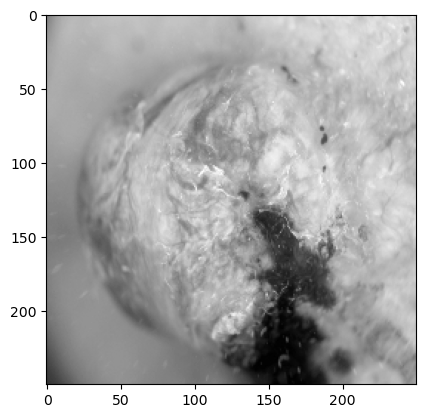

In [74]:
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
y_train[i]

In [ ]:
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')